In [1]:
import ND_north_star.src.noise_generators.perlin_noise_generator as PNG
# from ND_north_star.src.utils.sampling_function import random_sampler, dual_sampler
from ND_north_star.src.edge_detection.contour_points_2D import generate_boundary_splines


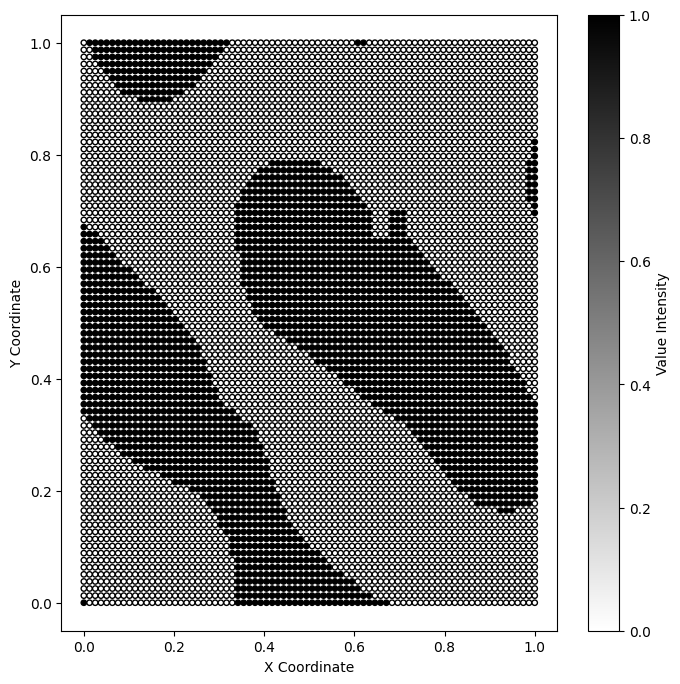

In [2]:
resolution = 80
octave = 3
dimensions = [resolution, resolution]

dataset = PNG.normalized_perlin_data(dimensions, octaves=octave)
PNG.plot_perlin_2D_3D(dataset, 'black')

Skipping boundary -1: Not enough points to fit a spline.


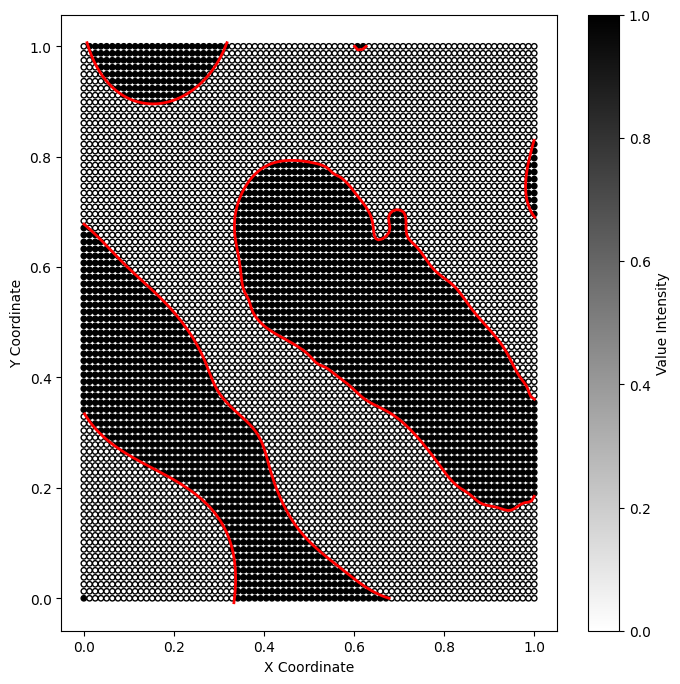

In [3]:
dataset = generate_boundary_splines(dataset, shared_boundary_points = 500)
PNG.plot_perlin_2D_3D(dataset, 'black')

In [4]:
import numpy as np

print(dataset.keys())

dict_keys(['features', 'values', 'resolution', 'coordinates', 'octaves', 'dimension', 'distinct_boundary_points', 'boundary_splines'])


In [5]:
keep_keys = ['features', 'values', 'octaves', 'resolution']

save_dict = {key: dataset[key] for key in keep_keys}


boundary_points = []
for ind, bound_points in dataset['boundary_splines'].items():
    boundary_points.extend(bound_points)
boundary_points = np.array(boundary_points)

save_dict['boundary_splines'] = boundary_points

convert_to_numpy = ['features', 'values']
for key in convert_to_numpy:
    save_dict[key] = np.array(save_dict[key])


In [6]:
for key, value in save_dict.items():

    try:
        print(key, type(value), value[:5])
    except:
        print(key, type(value), value)

features <class 'numpy.ndarray'> [[0.         0.        ]
 [0.         0.01265823]
 [0.         0.02531646]
 [0.         0.03797468]
 [0.         0.05063291]]
values <class 'numpy.ndarray'> [1 0 0 0 0]
octaves <class 'int'> 3
resolution <class 'list'> [80, 80]
boundary_splines <class 'numpy.ndarray'> [[2.92695637e-04 6.77871778e-01]
 [6.83706883e-03 6.73280548e-01]
 [1.32576255e-02 6.68597511e-01]
 [1.95677764e-02 6.63833454e-01]
 [2.57809323e-02 6.58999166e-01]]


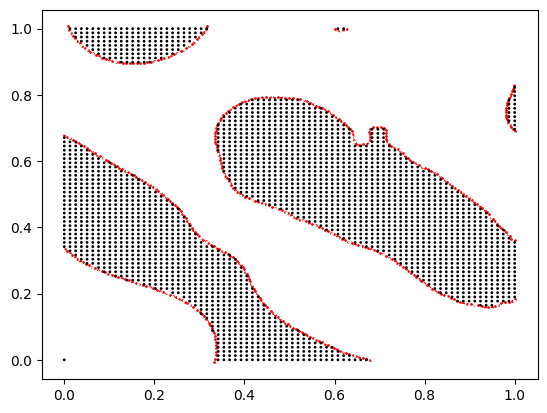

In [7]:
import matplotlib.pyplot as plt

X0, X1, V = np.array(dataset['features'])[:, 0], np.array(dataset['features'])[:, 1], dataset['values']

plt.scatter(boundary_points[:, 0], boundary_points[:, 1], c='red', s=1)
plt.scatter(X0, X1, c=V, s=1, cmap='gray_r')
plt.show()

In [8]:
# Create DataArrays

features = save_dict['features']
X0 = features[:, 0]
X1 = features[:, 1]

values = save_dict['values']

resolution = save_dict['resolution']
X0_resolution = resolution[0]
X1_resolution = resolution[1]

octaves = save_dict['octaves']

boundary_splines = save_dict['boundary_splines']
X0_boundary = boundary_splines[:, 0]
X1_boundary = boundary_splines[:, 1]



In [9]:


for i in range(5):


    range_test = 5

    print(X0[:range_test])
    print(X1[:range_test])
    print(values[:range_test])
    print(X0_resolution)
    print(X1_resolution)
    print(octaves)

    # len 500 
    print(X0_boundary[:range_test])
    print(X1_boundary[:range_test])

    # save to xarray where index = i 

[0. 0. 0. 0. 0.]
[0.         0.01265823 0.02531646 0.03797468 0.05063291]
[1 0 0 0 0]
80
80
3
[0.0002927  0.00683707 0.01325763 0.01956778 0.02578093]
[0.67787178 0.67328055 0.66859751 0.66383345 0.65899917]
[0. 0. 0. 0. 0.]
[0.         0.01265823 0.02531646 0.03797468 0.05063291]
[1 0 0 0 0]
80
80
3
[0.0002927  0.00683707 0.01325763 0.01956778 0.02578093]
[0.67787178 0.67328055 0.66859751 0.66383345 0.65899917]
[0. 0. 0. 0. 0.]
[0.         0.01265823 0.02531646 0.03797468 0.05063291]
[1 0 0 0 0]
80
80
3
[0.0002927  0.00683707 0.01325763 0.01956778 0.02578093]
[0.67787178 0.67328055 0.66859751 0.66383345 0.65899917]
[0. 0. 0. 0. 0.]
[0.         0.01265823 0.02531646 0.03797468 0.05063291]
[1 0 0 0 0]
80
80
3
[0.0002927  0.00683707 0.01325763 0.01956778 0.02578093]
[0.67787178 0.67328055 0.66859751 0.66383345 0.65899917]
[0. 0. 0. 0. 0.]
[0.         0.01265823 0.02531646 0.03797468 0.05063291]
[1 0 0 0 0]
80
80
3
[0.0002927  0.00683707 0.01325763 0.01956778 0.02578093]
[0.67787178 0.673

In [10]:
for i in range(1,5):
    print(i)

1
2
3
4


In [14]:
import xarray as xr
import pandas as pd

datasets = []

for i in range(5):
    print(i)
    data_vars = {
        'values': (('index',), values),
        'X0_boundary': (('boundary_index',), X0_boundary[:5]),
        'X1_boundary': (('boundary_index',), X1_boundary[:5])
    }

    coords = {
        'X0': (('index',), X0),
        'X1': (('index',), X1),
        'index': np.arange(len(values)),
        'boundary_index': np.arange(5)
    }

    attrs = {
        'X0_resolution': X0_resolution,
        'X1_resolution': X1_resolution,
        'octaves': octaves
    }

    ds = xr.Dataset(data_vars=data_vars, coords=coords, attrs=attrs)
    datasets.append(ds)

# Combine all datasets along a new dimension 'packet'
combined_ds = xr.concat(datasets, dim=pd.Index(range(5), name='packet'))

print(combined_ds)

0
1
2
3
4
<xarray.Dataset>
Dimensions:         (packet: 5, index: 6400, boundary_index: 5)
Coordinates:
    X0              (index) float64 0.0 0.0 0.0 0.0 0.0 ... 1.0 1.0 1.0 1.0 1.0
    X1              (index) float64 0.0 0.01266 0.02532 ... 0.9747 0.9873 1.0
  * index           (index) int32 0 1 2 3 4 5 ... 6394 6395 6396 6397 6398 6399
  * boundary_index  (boundary_index) int32 0 1 2 3 4
  * packet          (packet) int64 0 1 2 3 4
Data variables:
    values          (packet, index) int32 1 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0
    X0_boundary     (packet, boundary_index) float64 0.0002927 ... 0.02578
    X1_boundary     (packet, boundary_index) float64 0.6779 0.6733 ... 0.659
Attributes:
    X0_resolution:  80
    X1_resolution:  80
    octaves:        3


In [ ]:
import xarray as xr

data_array_images = xr.DataArray(features, values, resolution, octave, 
coords=[features, values, resolution, octave], 
dims=["features", "values", "resolution", "octave"])



TypeError: DataArray.__init__() got multiple values for argument 'coords'

In [ ]:
packet_index = np.repeat(np.arange(n_repeats), len(values))

print(packet_index)

[0 0 0 ... 3 3 3]


In [ ]:

# data_array_additional = xr.DataArray(additional_arrays, coords=[index, array_coord], dims=["index", "array_coord"])

# # Create Dataset and add attributes
# dataset = xr.Dataset(
#     {
#         "grayscale_values": data_array_images,
#         "additional_array": data_array_additional
#     },
#     attrs={
#         "resolution": (width, height),
#         "name": "example_image_series_with_array"
#     }
# )


# print(dataset)

In [ ]:
# Number of repetitions
n_repeats = 4

# Original data
features = np.array([[0.0, 0.0],
                     [0.0, 0.01265823],
                     [0.0, 0.02531646],
                     [0.0, 0.03797468],
                     [0.0, 0.05063291]])
values = np.array([1, 1, 1, 1, 1])
octaves = 3
resolution = [80, 80]

# Repeat the data
features_repeated = np.tile(features, (n_repeats, 1, 1))
values_repeated = np.tile(values, (n_repeats, 1))
octaves_repeated = np.array([octaves] * n_repeats)
resolution_repeated = np.array([resolution] * n_repeats)




In [ ]:
# Create the DataArray
data = xr.DataArray(
    data=np.zeros((n_repeats, len(values), len(features[0]))),  # Prepare data structure
    dims=["packet", "point", "feature"],
    coords={
        "packet": np.arange(n_repeats),
        "point": np.arange(len(values)),
        "feature": ["x", "y"],  # Assuming features are x, y coordinates
        "values": (("packet", "point"), values_repeated),
        "octaves": ("packet", octaves_repeated),
        "resolution": ("packet", resolution_repeated)
    }
)

# Assign the features data
data.loc[:, :, :] = features_repeated


ValueError: Could not convert tuple of form (dims, data[, attrs, encoding]): ('packet', array([[80, 80],
       [80, 80],
       [80, 80],
       [80, 80]])) to Variable.

In [ ]:
import numpy as np
import xarray as xr

# Function to generate a simple 2D grayscale image (for example, a gradient)
def generate_image(width, height, index):
    return np.linspace(0, 255, width * height).reshape((height, width)) + index * 10

# Function to generate an additional array of length 500
def generate_array(index):
    return np.random.rand(500) + index

# Parameters
num_images = 5
width, height = 100, 100

# Create a list to store images and arrays
images = [generate_image(width, height, i) for i in range(num_images)]
arrays = [generate_array(i) for i in range(num_images)]

# Stack images into a 3D numpy array
pixel_values = np.stack(images, axis=0)

# Stack arrays into a 2D numpy array
additional_arrays = np.stack(arrays, axis=0)

# Define coordinates
index = np.arange(num_images)
x = np.arange(width)
y = np.arange(height)
array_coord = np.arange(500)

# Create DataArrays
data_array_images = xr.DataArray(pixel_values, coords=[index, y, x], dims=["index", "y", "x"])
data_array_additional = xr.DataArray(additional_arrays, coords=[index, array_coord], dims=["index", "array_coord"])

# Create Dataset and add attributes
dataset = xr.Dataset(
    {
        "grayscale_values": data_array_images,
        "additional_array": data_array_additional
    },
    attrs={
        "resolution": (width, height),
        "name": "example_image_series_with_array"
    }
)


print(dataset)


<xarray.Dataset> Size: 423kB
Dimensions:           (index: 5, y: 100, x: 100, array_coord: 500)
Coordinates:
  * index             (index) int32 20B 0 1 2 3 4
  * y                 (y) int32 400B 0 1 2 3 4 5 6 7 ... 92 93 94 95 96 97 98 99
  * x                 (x) int32 400B 0 1 2 3 4 5 6 7 ... 92 93 94 95 96 97 98 99
  * array_coord       (array_coord) int32 2kB 0 1 2 3 4 ... 495 496 497 498 499
Data variables:
    grayscale_values  (index, y, x) float64 400kB 0.0 0.0255 ... 295.0 295.0
    additional_array  (index, array_coord) float64 20kB 0.5825 0.4893 ... 4.699
Attributes:
    resolution:  (100, 100)
    name:        example_image_series_with_array


In [ ]:
print(dataset['index'][0])

<xarray.DataArray 'index' ()> Size: 4B
array(0)
Coordinates:
    index    int32 4B 0
